### Оптимизация портфеля

Иницилизация, константы

In [1]:
from pfp_products import *
from pfp_optimization import *
from pfp_stat import *
import numpy as np
import pandas as pd 

# set constants & assumbtions

n_scenarios = 1000
simulation_years = 10         # срок моделирования инструментов - 10 лет
client_term = 10              # срок портфеля - 10 лет
points_in_year = 12           # 12 модельных точек в году

Моделируем базовые активы и продукты.
Сейчас этот модуль выводит статистики по моделируемым инструментам: средние, волатильности и корреляции. Все в масштабе года.

In [2]:
# базовые активы
BAs = read_prodcat('prodcat.xlsx')[2]
prices = ba_scenarios(BAs, simulation_years, points_in_year, n_scenarios)

# продукты
total, names = calc_products2(prices, simulation_years, points_in_year, client_term)

Means: 
BAYN GY Equity       0.051034
PIMGCIA ID equity    0.031510
MCD us equity        0.097899
TRDILMS RU EQUITY    0.065819
XLP us equity        0.048813
ADS GY equity        0.167868
PFE UN Equity        0.045947
DIS us equity        0.110666
HEN3 GY equity       0.070517
DAI GY equity        0.073006
SAN FP Equity       -0.033702
ROG SE Equity        0.005159
DAL us equity        0.231161
IXN us equity        0.168959
SBER LI EQUITY       0.027361
NOVN SE Equity       0.032227
TRDPTNT RU EQUITY    0.102709
TRDDRUZ RU EQUITY    0.108175
dtype: float64
Sigmas: 
BAYN GY Equity       0.031690
PIMGCIA ID equity    0.004473
MCD us equity        0.020697
TRDILMS RU EQUITY    0.010403
XLP us equity        0.014980
ADS GY equity        0.035377
PFE UN Equity        0.024172
DIS us equity        0.025126
HEN3 GY equity       0.026117
DAI GY equity        0.034951
SAN FP Equity        0.029694
ROG SE Equity        0.025640
DAL us equity        0.039583
IXN us equity        0.019998
SBER LI 

Строим распределение доходностей, считаем среднюю доходность, волатильности фин результата и риск (средние потери) по всем продуктам, участвующим в расчете.

1.0 		 ИСЖ ГФО


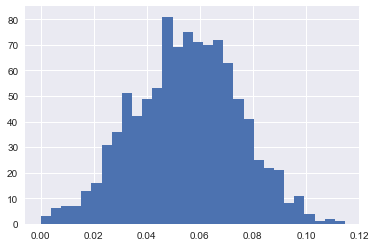

income = 		 0.0549030292356
volatility = 		 0.019842443121
risk =   		 0
------------------------
1.0 		 ИСЖ новые технологии


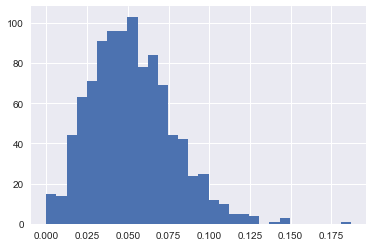

income = 		 0.0525384477275
volatility = 		 0.0254168704217
risk =   		 0
------------------------
1.0 		 ИСЖ потребительские товары


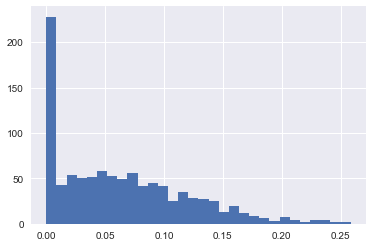

income = 		 0.0635197196414
volatility = 		 0.0562051314717
risk =   		 0
------------------------
1.0 		 ИСЖ MCD DAL DIS


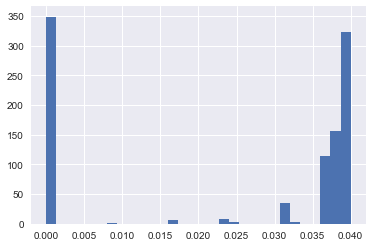

income = 		 0.0244975385946
volatility = 		 0.018187202589
risk =   		 0
------------------------
1.0 		 ИСЖ дойче купон


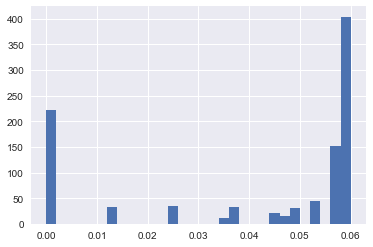

income = 		 0.0411830069315
volatility = 		 0.0245092545398
risk =   		 0
------------------------
1.0 		 ИСЖ 4 фармы


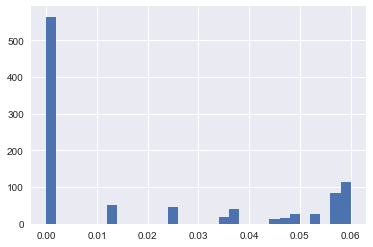

income = 		 0.0195922807581
volatility = 		 0.0247784207234
risk =   		 0
------------------------
1.0 		 ИСЖ 4+1 фармы


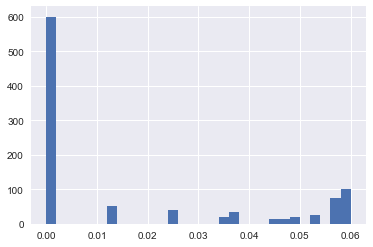

income = 		 0.0177431218384
volatility = 		 0.0241472994337
risk =   		 0
------------------------
1.0 		 Callable note MCD


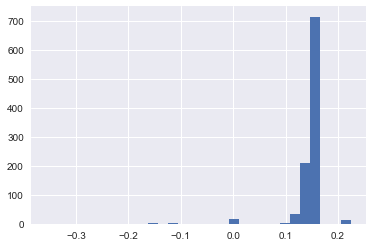

income = 		 0.141177033599
volatility = 		 0.0438536723431
risk =   		 0.209237103033
------------------------
1.0 		 Депозит 1


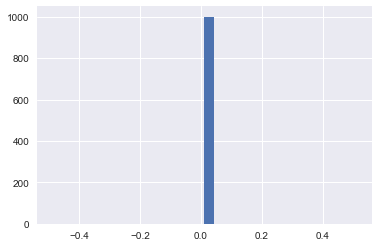

income = 		 0.01
volatility = 		 0
risk =   		 0
------------------------
1.0 		 Депозит 2


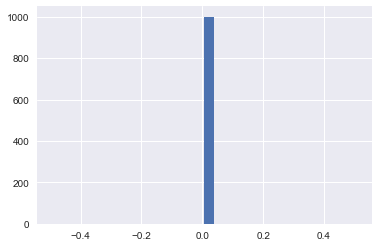

income = 		 0.00601652753096
volatility = 		 0
risk =   		 0
------------------------
1.0 		 ПИФ "Илья Муромец"


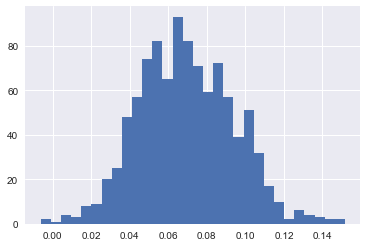

income = 		 0.0692586142554
volatility = 		 0.0246122588204
risk =   		 0.00502754073089
------------------------
1.0 		 ПИФ "Компании малой капитализации"


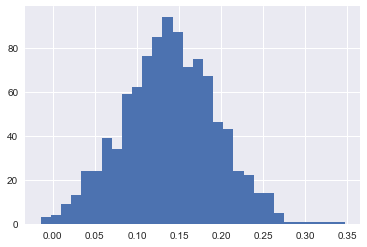

income = 		 0.139358270583
volatility = 		 0.0557867940468
risk =   		 0.008372174014
------------------------
1.0 		 ПИФ "Сбалансированный"


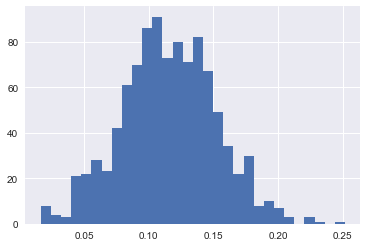

income = 		 0.11565002611
volatility = 		 0.0367687826845
risk =   		 0
------------------------
1.0 		 БСО АДР Сбербанка


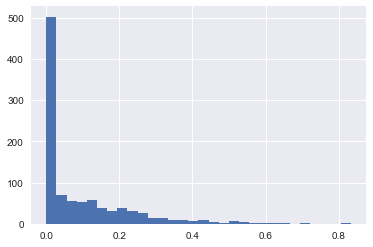

income = 		 0.0931888985982
volatility = 		 0.135267246891
risk =   		 0
------------------------


In [3]:
%matplotlib inline

# на какие продукты смотрим?
for i in range(0,len(names)):
    weights = np.zeros(len(names))
    weights[i] = 1
    report(weights, total, names)

#### Теперь будем оптимизировать.
Сначала будем штрафровать функицю полезности за уровень риска портфеля и уровень волатильности финансового результата.
Если штрафовать строго - останется только депозит, в котором нет ни риска, ни волатильности:

1.0 		 Депозит 1


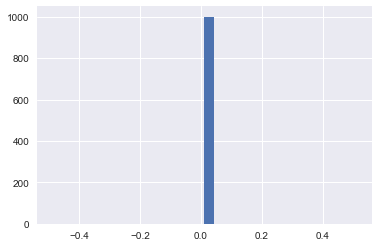

income = 		 0.01
volatility = 		 0
risk =   		 0
------------------------
CPU times: user 5min 25s, sys: 6.17 s, total: 5min 31s
Wall time: 9min 41s


In [4]:
%%time

#поехали
vol_penalty = 1
risk_penalty = 1

weights, func = find_best_wghts(total, vol_penalty, risk_penalty)
report(np.round(weights,2), total, names, vol_penalty, risk_penalty) 

Попробуем уменьшить штраф за волатильность. Видно, что теперь в портфель попало больше инструментов, причем основную долю забрали ГФО (43%), Новые технологии (25%) и ПИФ Илья Муромец (21%).

0.43 		 ИСЖ ГФО
0.25 		 ИСЖ новые технологии
0.01 		 ИСЖ потребительские товары
0.02 		 ИСЖ дойче купон
0.21 		 ПИФ "Илья Муромец"
0.08 		 ПИФ "Сбалансированный"


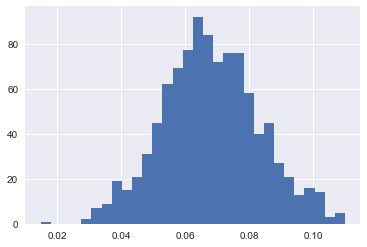

income = 		 0.0680854368094
volatility = 		 0.0151286565307
risk =   		 0
------------------------
CPU times: user 6min 2s, sys: 6.89 s, total: 6min 9s
Wall time: 40min 9s


In [5]:
%%time
#поехали
vol_penalty = 0.5
risk_penalty = 1

weights, func = find_best_wghts(total, vol_penalty, risk_penalty)
report(np.round(weights,2), total, names, vol_penalty, risk_penalty) 

Уберем штраф за волатильность совсем. 
Теперь модель старательно минимизирует риск, но на волатильность доходности не обращет внимания. И максимизирует среднюю доходность.

Баланс в портфеле изменился. 
Теперь ГФО 18%, ПИФ Сбалансированный - 14%, а БСО на АДР Сбера - 67%!

In [6]:
%%time
#поехали
vol_penalty = 0
risk_penalty = 1

weights, func = find_best_wghts(total, vol_penalty, risk_penalty)
report(np.round(weights,2), total, names, vol_penalty, risk_penalty) 

KeyboardInterrupt: 

Отменим штрафы за волатильности и риск совсем.
Как и ожидалось - модель оставляет в портфеле всего один продукт - ПИФ компаний малой капитализации.

In [ ]:
%%time
#поехали
vol_penalty = 0
risk_penalty = 0

weights, func = find_best_wghts(total, vol_penalty, risk_penalty)
report(np.round(weights,2), total, names, vol_penalty, risk_penalty) 